In [68]:
import tsp_data_util as tsp_data_util
import tsplib95
import torch
import time
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import gc
from pso import pso
from aco import aco
import os

In [64]:
def getData(technique, problem):
    start = time.time()
    
    # runs the  problem with the technique 
    result = technique(problem.edge_weights)
    end = time.time()
    
    # gets the solution
    returned_solution = result['sequence']
    
    #the time 
    runtime = end-start
    
    # memory
    """TODO: Check that memory actually works"""
    #memory = torch.cuda.memory_allocated(0)
    memory = 0
    
    #function evalauations 
    func_evals = result['func_evals']
    
    #used parameters
    params = result['parameters']

    #find proximity to optimal solution
    solution_distance = tsp_data_util.get_tour_length(problem.file, returned_solution)
    approximation_ratio = solution_distance/problem.solution_length

    return {'memory' : memory, 'closeness' : approximation_ratio, 'func_evals' : func_evals, 'runtime' : runtime}

In [9]:
def generatePlots(results):
    fig, ax = plt.subplots(nrows=1, ncols=3)

    ax[0].scatter(results['memory'], results['closeness'])
    ax[0].set_title('Memory vs. AR')
    ax[0].set_ylabel('Approximation Ratio')
    ax[0].set_xlabel('Memory')
    
    ax[1].scatter(results['func_evals'], results['closeness'])
    ax[1].set_title('Distance Checks vs. AR')
    ax[1].set_ylabel('Approximation Ratio')
    ax[1].set_xlabel('Distance Checks')
    
    ax[2].scatter(results['runtime'], results['closeness'])
    ax[2].set_title('Runtime vs. AR')
    ax[2].set_ylabel('Approximation Ratio')
    ax[2].set_xlabel('Runtime')

    fig.suptitle(results['technique'])
    fig.tight_layout()

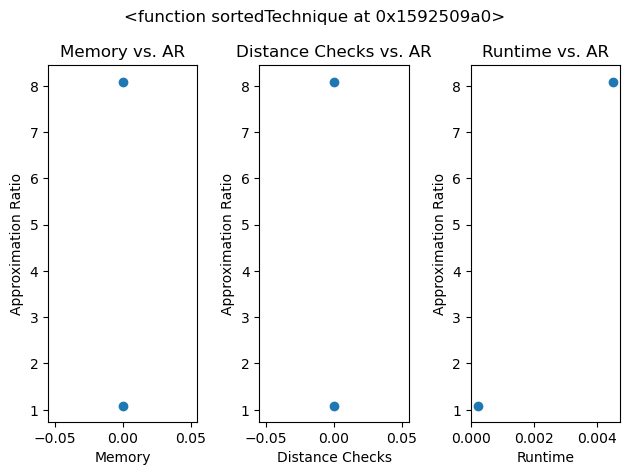

<Figure size 1000x700 with 0 Axes>

In [78]:
#collect techniques in an array
techniques = [sortedTechnique]

#problems = fill_problems(directory)
problems = [p1,p2]

# run each function on many problems to compare results
for t in techniques:
    figs = []
    # run each problem on the technique
    results = {'memory' : [], 'runtime': [], 'func_evals': [], 'closeness': []}
    for p in problems:
        #take data and add to list for plotting purposes
        r = getData(t,p)
        results['memory'].append(r['memory'])
        results['func_evals'].append(r['func_evals'])
        results['runtime'].append(r['runtime'])
        results['closeness'].append(r['closeness'])
        
    #for each function, generate a subfigure with each plot
    results['technique'] = t
    figs.append(generatePlots(results))

fig = plt.figure(figsize=(10, 7))
(figs[0]) = fig.subfigures(3, 1)
plt.show()

In [36]:
def sortedTechnique(e_matrix):
    res = torch.tensor(range(1,e_matrix.shape[0]+1))
    func_evals = 0
    params = {}
    return {'func_evals': func_evals, 'sequence': res, 'parameters':params}

In [22]:
class Problem:
    
    def __init__(self, edge_weights, solution, solution_length, tspfile):
        self.edge_weights = edge_weights
        self.solution = solution
        self.solution_length = solution_length
        self.file = tspfile

In [79]:
optimal_tour_distance = tsp_data_util.optimal_tour_distance
tsp_file = 'heidelberg_TSP_data/ch150.tsp'  # coord matrix

weight_matrix = tsp_data_util.generate_edge_weight_matrix(tsp_file)
print("Edge Weight Matrix:")
print(weight_matrix)

opt_solution_tour = tsp_data_util.get_optimal_tour(tsp_file)
print(opt_solution_tour)

opt_solution_length = tsp_data_util.get_tour_length(tsp_file, opt_solution_tour)
print(opt_solution_length)

p1 = Problem(weight_matrix, opt_solution_tour, opt_solution_length, tsp_file)


tsp_file = 'heidelberg_TSP_data/a280.tsp'  # coord matrix
weight_matrix = tsp_data_util.generate_edge_weight_matrix(tsp_file)
opt_solution_tour = tsp_data_util.get_optimal_tour(tsp_file)
opt_solution_length = tsp_data_util.get_tour_length(tsp_file, opt_solution_tour)

p2 = Problem(weight_matrix, opt_solution_tour, opt_solution_length, tsp_file)

Edge Weight Matrix:
tensor([[  0., 577., 188.,  ..., 770., 270., 379.],
        [577.,   0., 591.,  ..., 368., 607., 615.],
        [188., 591.,   0.,  ..., 688.,  83., 194.],
        ...,
        [770., 368., 688.,  ...,   0., 657., 600.],
        [270., 607.,  83.,  ..., 657.,   0., 113.],
        [379., 615., 194.,  ..., 600., 113.,   0.]])
tensor([  1,  98, 103,  82,  95, 107,   5, 100, 143,  97, 146,  26,  75,  18,
        142,  85,  65, 132, 137,  50,  55,  58, 141,  83,  56,  90,  46,  92,
         54, 138, 134, 131,  32,  23,  38,  67,  43, 109,  51,  20,  25, 110,
         81,  29,  86, 135,  70, 108, 102, 114,  99,  19,   2,  37,   6,  28,
          9,  42, 120,  47, 139,  40,  53, 118,  24,  12, 116, 101,  41,  57,
         39, 127,  69,  36,  61,  11, 148, 130,  17,  66,  60, 140, 117, 129,
         27,  31, 123,  74,  13, 106,  91, 119,  68, 128,  45,  71,  44,  64,
        112, 136, 145, 144,  49, 147,  72,  80,  14, 122,  77, 133,  15,  78,
         21, 150, 115,   4, 10

In [ ]:
def fill_problems(directory):
    problems = []
    files = os.listdir(directory)
    for file in files:
        print(file)
        if file.endswith('.tsp'):
            tsp_file = directory + '/' + file
            weight_matrix = tsp_data_util.generate_edge_weight_matrix(tsp_file)
            opt_solution_tour = tsp_data_util.get_optimal_tour(tsp_file)
            if opt_solution_tour:
                opt_solution_length = tsp_data_util.get_tour_length(tsp_file, opt_solution_tour)
                p = Problem(weight_matrix, opt_solution_tour, opt_solution_length, tsp_file)
                problems.append(p)
            else:
                continue
    return problems
print(fill_problems('heidelberg_TSP_data'))

Issues with optimization functions:

PSO: tensor path contains non-integer values
ACO: computations use np array instead of tensors
TABU: Returns list of cities, not dictionary with tensors